In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-27 00:27:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

     0K ..........                                            100% 8.24M=0.001s

2023-07-27 00:28:00 (8.24 MB/s) - 'helper_functions.py' saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            image_size=IMG_SIZE,

                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=32)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0 : Building a transfer learning model using the Keras Functional API

The sequential API is straight forward but functional gives us more flexibility with out models 

In [10]:
## Create base model using tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="Input Layer")

## If using ResNet50v2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Pass the inputs  
x = base_model(inputs)
print(f"Shape after passing inputs through base model:{x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D:{x.shape}")

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_10_percent = model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="trainsferlearning",experiment_name="10_percent")])

Shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D:(None, 1280)
Saving TensorBoard log files to: trainsferlearning/10_percent/20230728-165759
Epoch 1/5


c:\Users\samim\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 26s 454ms/step - loss: 1.9540 - accuracy: 0.3747 - val_loss: 1.3760 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - 6s 240ms/step - loss: 1.1764 - accuracy: 0.7147 - val_loss: 0.9168 - val_accuracy: 0.7993
Epoch 3/5
24/24 [==============================] - 6s 248ms/step - loss: 0.8512 - accuracy: 0.8027 - val_loss: 0.7766 - val_accuracy: 0.8059
Epoch 4/5
24/24 [==============================] - 6s 242ms/step - loss: 0.6923 - accuracy: 0.8280 - val_loss: 0.6733 - val_accuracy: 0.8306
Epoch 5/5
24/24 [==============================] - 6s 237ms/step - loss: 0.5980 - accuracy: 0.8493 - val_loss: 0.6070 - val_accuracy: 0.8405


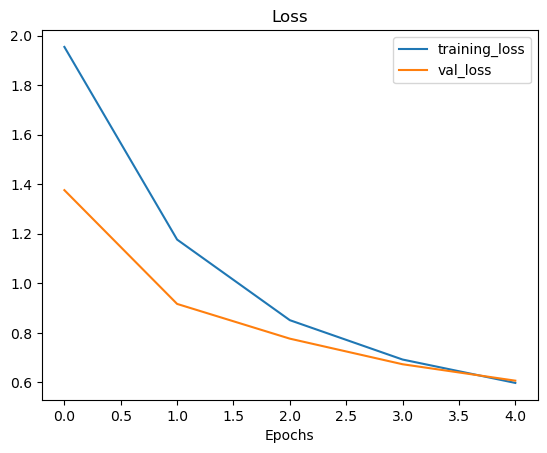

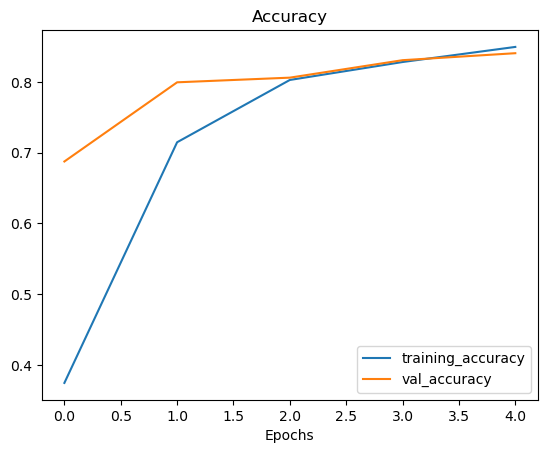

In [11]:
plot_loss_curves(history_10_percent)

In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 0.6066 - accuracy: 0.8416


[0.6066041588783264, 0.8416000008583069]

In [12]:
# Check the layers in our base model
for layer_number,layer in enumerate(base_model.layers):
    print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

^C


In [13]:
train_dir_1_percent = "10_food_classes_1_percent/train" 
test_dir = "10_food_classes_1_percent/test"

In [14]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [15]:
IMG_SIZE=(224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,label_mode="categorical",image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [17]:
data_augumentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
],name="data_augumentation")

(-0.5, 556.5, 236.5, -0.5)

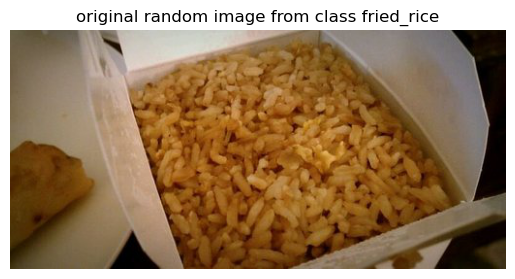

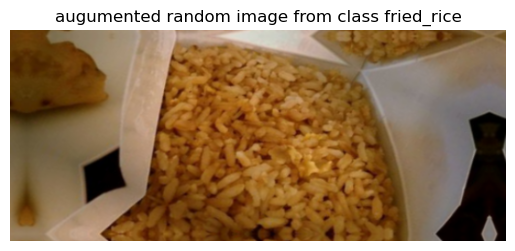

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" +random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class {target_class}")
plt.axis(False)
# print(img)

# plotting augumented image

augumented_img = data_augumentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f"augumented random image from class {target_class}")
plt.imshow(tf.squeeze(augumented_img)/255.)
plt.axis(False)

# print(augumented_img)

In [19]:
input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False


inputs = layers.Input(shape=input_shape,name="input_layer")

x = data_augumentation(inputs)

x= base_model(x,training=False)
x =  layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1 = keras.Model(inputs,outputs)
model_1.compile(loss="categorical_crossentropy",optimizer= tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1_percent = model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch = len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="trainsferlearning",experiment_name="1_percent_data_aug")])


Saving TensorBoard log files to: trainsferlearning/1_percent_data_aug/20230728-165939
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.4676 - accuracy: 0.0714 - val_loss: 2.3705 - val_accuracy: 0.1201
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.2301 - accuracy: 0.1857 - val_loss: 2.2482 - val_accuracy: 0.1530
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9756 - accuracy: 0.3286 - val_loss: 2.1228 - val_accuracy: 0.2303
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.8371 - accuracy: 0.4429 - val_loss: 2.0292 - val_accuracy: 0.3043
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6744 - accuracy: 0.5000 - val_loss: 1.9312 - val_accuracy: 0.3799


## Model 2 feature extraction model with 10 percent of data and data augumentation 


In [20]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [21]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,label_mode="categorical",image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [22]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [23]:
data_augumentation= Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255)
])
input_shape =(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape=input_shape,name="input_layer")
x=data_augumentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(10,activation="softmax")(x)
model_2= tf.keras.Model(inputs,outputs)
model_2.compile(loss="categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [27]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________

## Create a model checkpoint 
intermediately saves the model the full model or just the weights this is useful so we can come and start where we left offf


In [24]:
# Set checkpoint path 
checkpoint_path =  'ten_percent_model_checpoints_weight/checkpoint.ckpt'
# Create a model checkpiont that saves the model's weights only 
checkpoint_callback  = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,save_best_only=False,save_freq="epoch",verbose=1)

In [25]:
model_2_history = model_2.fit(train_data_10_percent,epochs=5,steps_per_epoch = len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[checkpoint_callback])


Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9454 - accuracy: 0.3933
Epoch 00001: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 24s 802ms/step - loss: 1.9454 - accuracy: 0.3933 - val_loss: 1.3819 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2175 - accuracy: 0.7093
Epoch 00002: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 15s 638ms/step - loss: 1.2175 - accuracy: 0.7093 - val_loss: 0.9330 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9114 - accuracy: 0.7867
Epoch 00003: saving model to ten_percent_model_checpoints_weight\checkpoint.ckpt
24/24 [==============================] - 16s 661ms/step - loss: 0.9114 - accuracy: 0.7867 - val_loss: 0.7531 - val_accuracy: 0.8257
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.7574 - accura

In [26]:
model_0.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 0.6066 - accuracy: 0.8416


[0.6066042184829712, 0.8416000008583069]

In [27]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 0.6301 - accuracy: 0.8336


[0.6300726532936096, 0.8335999846458435]

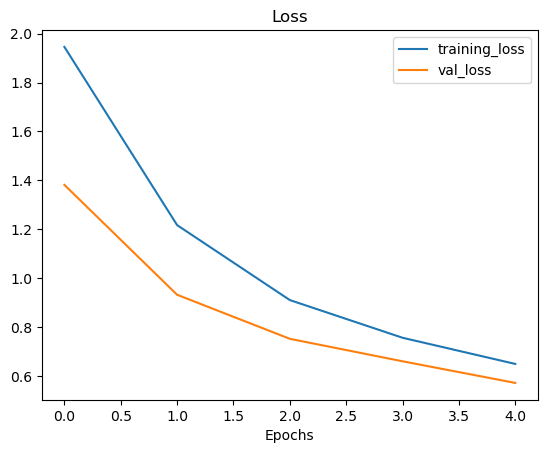

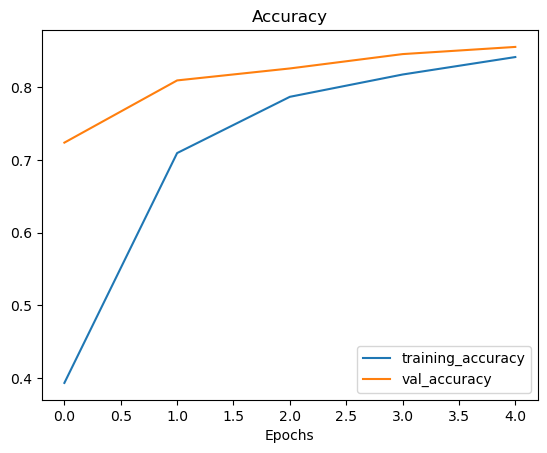

In [28]:
plot_loss_curves(model_2_history)

In [29]:
model_2.load_weights(checkpoint_path)

In [30]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.6301 - accuracy: 0.8336


In [31]:
import numpy as np

In [32]:
np.isclose??

Signature: np.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
Source:   
@array_function_dispatch(_isclose_dispatcher)
def isclose(a, b, rtol=1.e-5, atol=1.e-8, equal_nan=False):
    """
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.

    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.

    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).

    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
       

In [33]:
initial_epochs=5

In [34]:
for layer in model_2.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001B536B18A60> True
<keras.engine.sequential.Sequential object at 0x000001B41DF84820> True
<keras.engine.functional.Functional object at 0x000001B5A48BDF70> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x000001B52A4105E0> True
<keras.layers.core.dense.Dense object at 0x000001B5A49328B0> True


In [35]:
for i,layer in enumerate(model_2.layers[2].layers):
    print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [36]:
# to begin fine tuning lets start by setting the last 10 layers of our base modedl to traibale to true
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable= False


In [37]:
model_2.compile(loss="categorical_crossentropy",optimizer= tf.keras.optimizers.Adam(lr=0.0001)# when fine tuning you typicall want to reduce your learning rate by 10  times
                ,metrics = ["accuracy"])

c:\Users\samim\anaconda3\envs\tfgpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
# check which layers are trainable

for layer_numer,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

NameError: name 'layer_number' is not defined

In [41]:
# fine tune for another 5 epochs

fine_tune_epochs = initial_epochs +5 
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,epochs=fine_tune_epochs,validation_data=test_data,validation_steps=int(0.25*len(test_data)),initial_epoch=model_2_history.epoch[-1],callbacks=[create_tensorboard_callback(dir_name="transfer_learning",experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230728-170450
Epoch 5/10


c:\Users\samim\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 22s 640ms/step - loss: 0.5630 - accuracy: 0.8307 - val_loss: 0.4824 - val_accuracy: 0.8454
Epoch 6/10
24/24 [==============================] - 13s 541ms/step - loss: 0.4278 - accuracy: 0.8773 - val_loss: 0.4238 - val_accuracy: 0.8487
Epoch 7/10
24/24 [==============================] - 11s 477ms/step - loss: 0.3602 - accuracy: 0.8827 - val_loss: 0.4282 - val_accuracy: 0.8454
Epoch 8/10
24/24 [==============================] - 12s 514ms/step - loss: 0.2989 - accuracy: 0.9200 - val_loss: 0.4111 - val_accuracy: 0.8520
Epoch 9/10
24/24 [==============================] - 13s 535ms/step - loss: 0.2566 - accuracy: 0.9413 - val_loss: 0.3997 - val_accuracy: 0.8569
Epoch 10/10
24/24 [==============================] - 10s 425ms/step - loss: 0.2367 - accuracy: 0.9413 - val_loss: 0.3914 - val_accuracy: 0.8635


In [42]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 0.4425 - accuracy: 0.8520


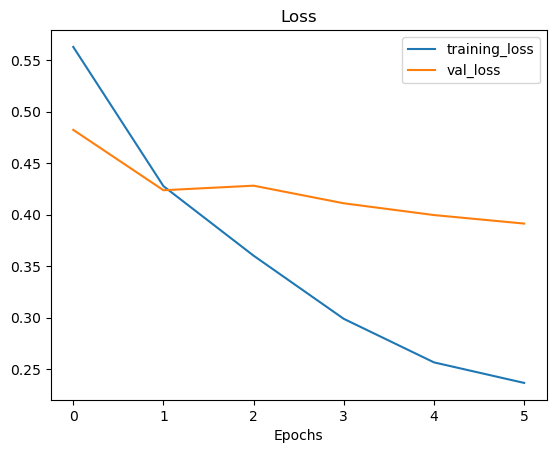

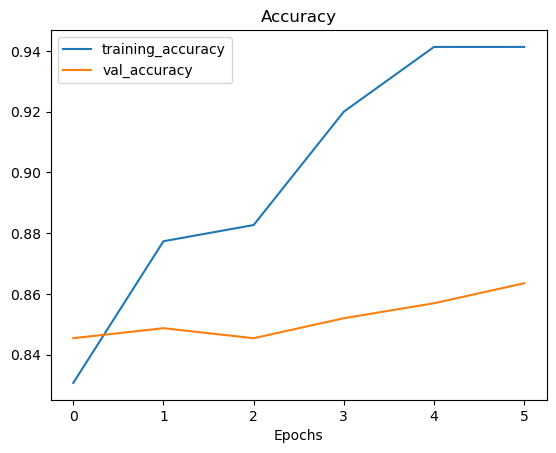

In [43]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [44]:
# Lets  create a function to compaare training histories

def compare_history(original_history, new_history, initial_epochs=5):
    acc = original_history.history['accuracy']
    loss = original_history.history['loss']

    val_acc = original_history.history['val_accuracy']
    val_loss = original_history.history['val_loss']
    total_acc = acc + new_history.history['accuracy']
    total_loss = loss + new_history.history['loss']

    total_val_acc = val_acc + new_history.history['val_accuracy']
    total_val_loss = val_loss + new_history.history['val_loss']
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Val Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Val Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

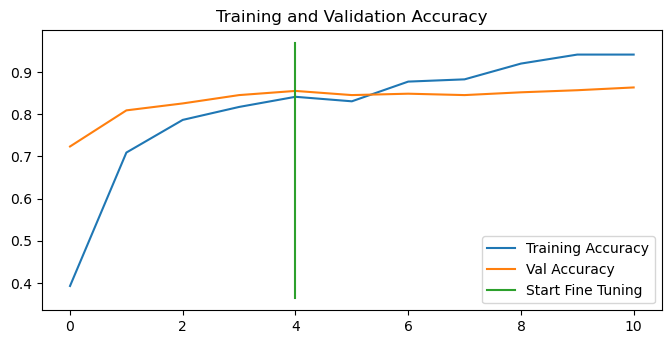

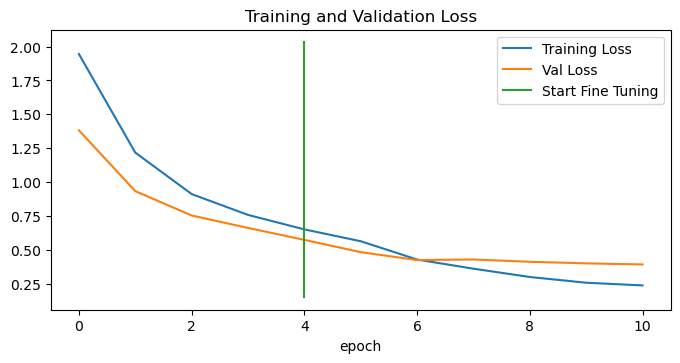

In [45]:
compare_history(model_2_history,history_fine_10_percent_data_aug)

In [46]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip   
unzip_data("10_food_classes_all_data.zip")

^C


KeyboardInterrupt: 

In [47]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [48]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [49]:
import tensorflow as tf
IMG_SHAPE=(224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_all_data,label_mode='categorical',image_size=IMG_SHAPE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,label_mode='categorical',image_size=IMG_SHAPE)



Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
# Model 2  results
model_2.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 0.4425 - accuracy: 0.8520


[0.4425406754016876, 0.8519999980926514]

In [51]:
results_fine_tune_10_percent

[0.44254061579704285, 0.8519999980926514]

# To train a fine tuning model we need to revert model2 bak to its feature extraction weights

In [52]:
# Load weights from checkpoint that way we can fine tune from the same stage the 10 eprcent data model was fine tuned from 
model_2.load_weights(checkpoint_path)

In [53]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.6301 - accuracy: 0.8336


[0.6300726532936096, 0.8335999846458435]

In [54]:
for layer_number,layer in enumerate(model_2.layers):
    print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 sequential True
2 efficientnetb0 True
3 global_average_pooling2d_1 True
4 dense True


Lets drill into our base model and see what layers are trainable

In [55]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [56]:
model_2.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [57]:
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,epochs=fine_tune_epochs,validation_data=test_data,validation_steps=int(0.25*len(test_data)),initial_epoch=model_2_history.epoch[-1],callbacks=[create_tensorboard_callback("transfer_learning","full_data_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_data_fine_tune_last_10/20230728-170806
Epoch 5/10


--2023-07-28 17:06:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.192.16, 142.250.192.48, 142.250.192.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.192.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip.1'

     0K .......... .......... .......... .......... ..........  0%  114K 73m49s
    50K .......... .......... .......... .......... ..........  0%  171K 61m33s
   100K .......... .......... .......... .......... ..........  0%  439K 47m26s
   150K .......... .......... .......... .......... ..........  0%  429K 40m30s
   200K .......... .......... .......... .......... ..........  0%  501K 35m46s
   250K .......... .......... .......... .......... ..........  0%  828K 31m30s
   300K .......... .......... .......... .......... ..........  0

235/235 [==============================] - 102s 404ms/step - loss: 0.6062 - accuracy: 0.8065 - val_loss: 0.4056 - val_accuracy: 0.8684
Epoch 6/10
235/235 [==============================] - 80s 336ms/step - loss: 0.4713 - accuracy: 0.8472 - val_loss: 0.3492 - val_accuracy: 0.8914
Epoch 7/10
235/235 [==============================] - 70s 299ms/step - loss: 0.4078 - accuracy: 0.8693 - val_loss: 0.3279 - val_accuracy: 0.8865
Epoch 8/10
235/235 [==============================] - 70s 297ms/step - loss: 0.3549 - accuracy: 0.8891 - val_loss: 0.3210 - val_accuracy: 0.8914
Epoch 9/10
235/235 [==============================] - 66s 280ms/step - loss: 0.3199 - accuracy: 0.8968 - val_loss: 0.3510 - val_accuracy: 0.8964
Epoch 10/10
235/235 [==============================] - 62s 263ms/step - loss: 0.2843 - accuracy: 0.9097 - val_loss: 0.3046 - val_accuracy: 0.9030


In [58]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.2767 - accuracy: 0.9136


[0.2766772508621216, 0.9136000275611877]

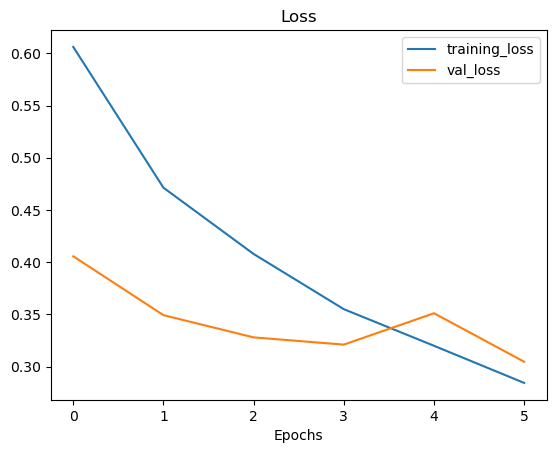

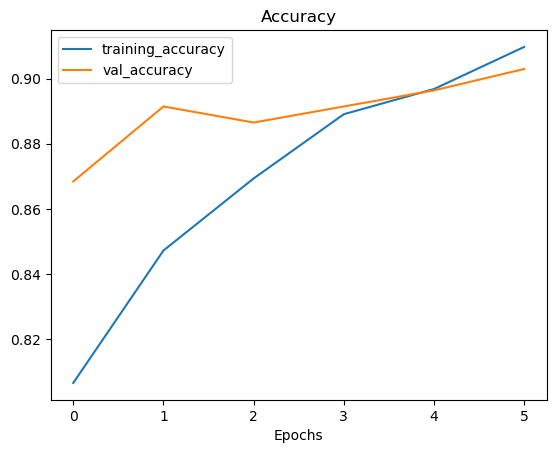

In [59]:
plot_loss_curves(history_fine_10_classes_full)

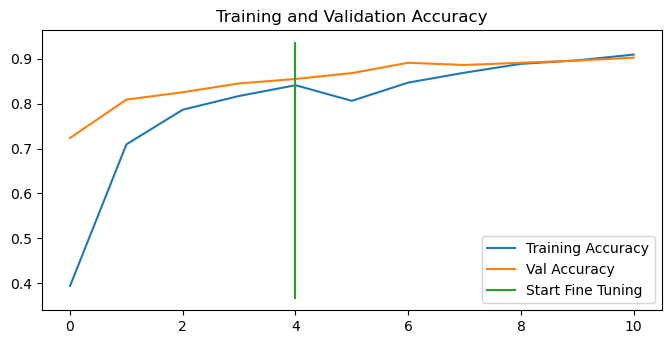

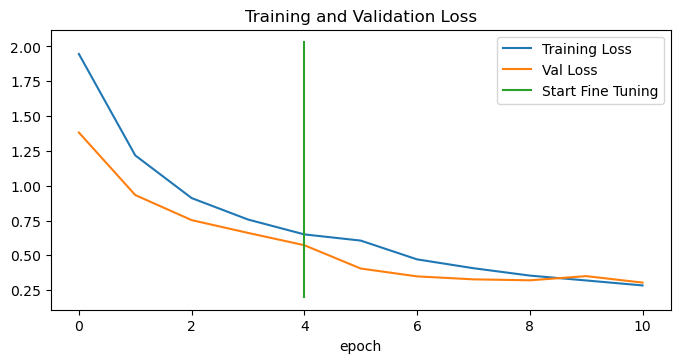

In [60]:
compare_history(model_2_history, history_fine_10_classes_full)

In [83]:
!tensorboard dev upload --logdir ./transfer_learning --name "transfer Learning experiments with 10 food classes 101 classes" --description "transfer learning experiments with varying amounts of data and fine tuning with 10 food classes and 101 classes" --one_shot 

^C
